In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
import numpy as np
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [2]:
# Please insert Bearer token here
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAANM2ZAEAAAAAGCLl1xAP3r9d8GaAlulL4RyTMEw%3DzrYLQTSTGgbqSlIZA4wXwY81XfsnQQaHTS941qt0aF8OP3hxRr'

In [3]:
def auth():
    return os.getenv('TOKEN')

In [4]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [5]:
# Creating a endpoint url function according to apiv2 documentation
def create_url(keyword, start_date, end_date, max_results = 10):
    #Endpoint url from which you want to collect the data from
    search_url = "https://api.twitter.com/2/tweets/search/recent" 

    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [6]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [9]:
bearer_token = auth()
headers = create_headers(bearer_token)
keyword_covid = "Covid lang:en"


start_time = "2022-04-15T00:00:00.000Z"
end_time = "2022-04-21T00:00:00.000Z"
max_results = 100

In [10]:
url_covid = create_url(keyword_covid, start_time,end_time, max_results)

json_response_covid = connect_to_endpoint(url_covid[0], headers, url_covid[1])

Endpoint Response Code: 200


In [12]:
#To print the tweets here
#print(json.dumps(json_response_covid, indent=4, sort_keys=True))

In [24]:
# Creating csv file for covid
csvFile_covid = open("covid.csv", "a", newline="", encoding='utf-8')
csvWriter_covid = csv.writer(csvFile_covid)

#Create headers for the data you want to save
csvWriter_covid.writerow(['author id', 'created_at', 'id','tweet'])
csvFile_covid.close()

In [25]:
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        # 1. Author id
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Tweet ID
        tweet_id = tweet['id']
        # 4. Tweet text
        text = tweet['text']
         # Assemble all data in a list
        res = [author_id, created_at, tweet_id, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 


In [26]:
append_to_csv(json_response_covid, "covid.csv")


# of Tweets added from this response:  99


In [13]:
import re
import string
import nltk

In [14]:
#nltk.download('stopwords')

In [15]:
data = pd.read_csv(r"C:\Users\14372\Downloads\covid.csv")

In [16]:
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [17]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['tweet'])
print(X_counts.shape)
print(count_vect.get_feature_names())

In [32]:
X_counts

<211x1406 sparse matrix of type '<class 'numpy.int64'>'
	with 2966 stored elements in Compressed Sparse Row format>

In [33]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

C:\Users\14372\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aaronhoyland,abc,abl,absolut,account,acquaint,actual,ad,addit,...,yet,yield,yo,young,yourmelodi,zalemayu,zero,zone,zubairalikhanun,امپ
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [36]:
from sklearn.decomposition import PCA

In [45]:
sklearn_pca = PCA(n_components = 2) # Using PCA to remove cols which has less co-relation
Y_sklearn = sklearn_pca.fit_transform(X_counts_df) #fit_transform() is used to scale training data to learn parameters such as 
# mean & variance of the features of training set and then these parameters are used to scale our testing data.
n_clusters = 5
kmeans = KMeans(n_clusters= n_clusters, max_iter=400, algorithm = 'auto')# Partition 'n' no. of observations into 'k' no. of clusters. 
fitted = kmeans.fit(Y_sklearn) # Fitting k-means model  to feature array
prediction = kmeans.predict(Y_sklearn) # predicting clusters class '0' or '1' corresponding to 'n' no. of observations

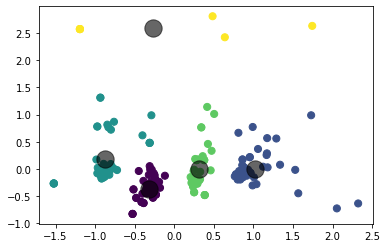

In [46]:
def kmeans_clustering(Y_sklearn, fitted):
    """
    This function will predict clusters on training set and plot the visuals of clusters as well.
    """

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis') # Plotting scatter plot 
    centers2 = fitted.cluster_centers_ # It will give best possible coordinates of cluster center after fitting k-means
    plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);
kmeans_clustering(Y_sklearn, fitted)

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_counts_df)

C:\Users\14372\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\14372\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


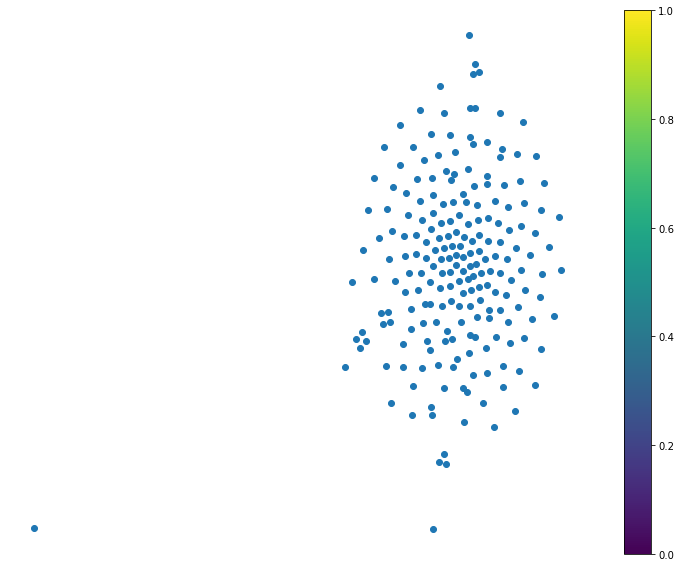

In [40]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="Paired")
plt.axis('off')
plt.colorbar()
plt.show()